In [43]:
#### FIRST IMPORTS ####
import matplotlib
import matplotlib.pyplot
import numpy as np
import pandas as pd
import seaborn as sns
sns.set()

In [5]:
#### SKLEARN ####
#!pip install -U scikit-learn
import sklearn 
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score

In [7]:
#### READING DATASET ####
pokemon_df = pd.read_csv("Pokemon.csv")
#### CONCERNED DATASET #### 
# https://www.kaggle.com/abcsds/pokemon/activity

In [8]:
pokemon_df.dtypes

#              int64
Name          object
Type 1        object
Type 2        object
Total          int64
HP             int64
Attack         int64
Defense        int64
Sp. Atk        int64
Sp. Def        int64
Speed          int64
Generation     int64
Legendary       bool
dtype: object

In [9]:
pokemon_df.head()

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False


In [60]:
#### WHAT'S THE LINK BETWEEN ATTACK AND ANY OTHER STAT ? ####

In [55]:
#### DELETING USELESS COLUMNS ####
atkSpd = pokemon_df.drop(columns = ['Type 1', 'Type 2', 'Total', 'Sp. Atk', 'Sp. Def', 'Generation', 'Legendary'])
atkSpd.head(20)

,#,Name,HP,Attack,Defense,Speed
0,1,Bulbasaur,45,49,49,45
1,2,Ivysaur,60,62,63,60
2,3,Venusaur,80,82,83,80
3,3,VenusaurMega Venusaur,80,100,123,80
4,4,Charmander,39,52,43,65
5,5,Charmeleon,58,64,58,80
6,6,Charizard,78,84,78,100
7,6,CharizardMega Charizard X,78,130,111,100
8,6,CharizardMega Charizard Y,78,104,78,100
9,7,Squirtle,44,48,65,43


In [27]:
#### CHECKING DUPLICATE ####
atkSpd.duplicated(subset = ['Name']).sum()

0

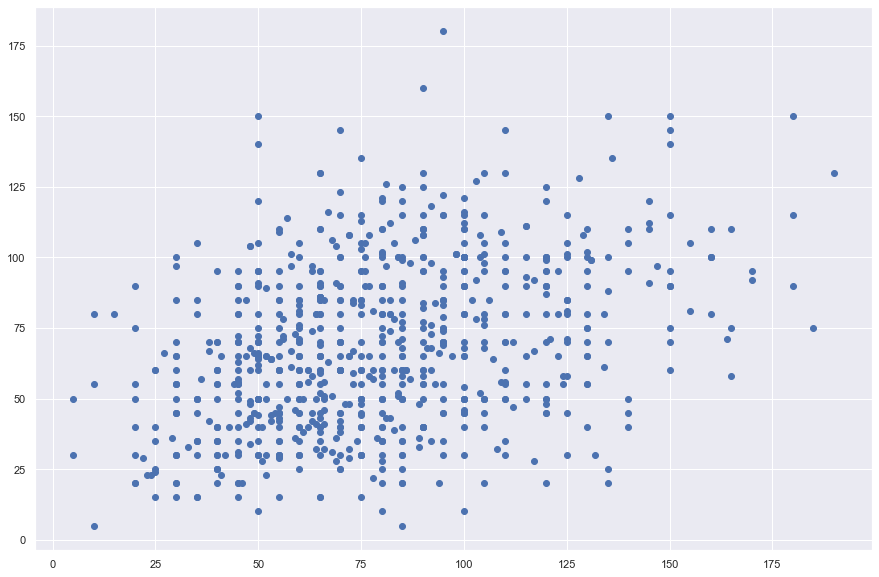

In [61]:
#### ATK SPEED ####
matplotlib.pyplot.figure(figsize=(15,10))
showingAtkSpd = plt.matplotlib.pyplot.scatter(atkSpd['Attack'], atkSpd['Speed'])

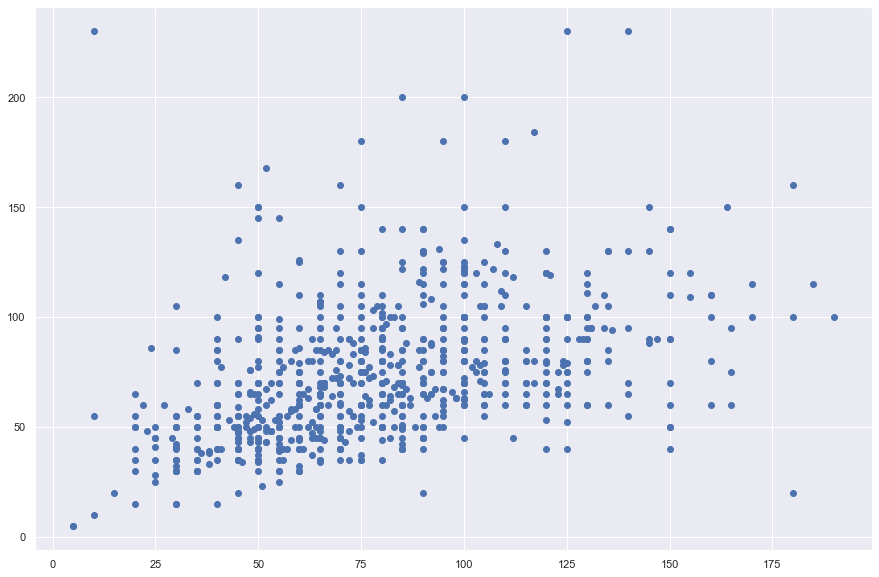

In [66]:
#### ATK DEFENSE ####
matplotlib.pyplot.figure(figsize=(15,10))
showingAtkDef = plt.matplotlib.pyplot.scatter(atkSpd['Attack'], atkSpd['Defense'])

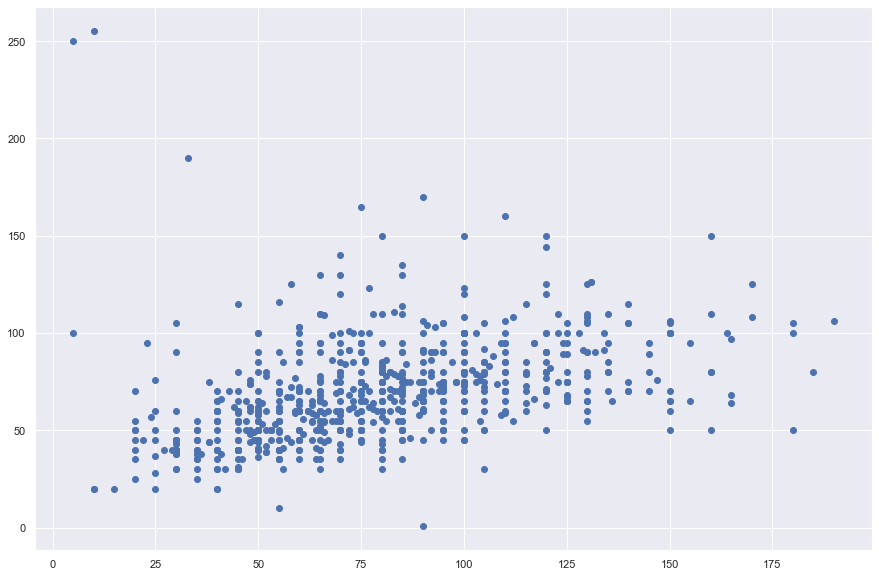

In [65]:
#### ATK HP ####
matplotlib.pyplot.figure(figsize=(15,10))
showingAtkHP = plt.matplotlib.pyplot.scatter(atkSpd['Attack'], atkSpd['HP'])

In [71]:
#### VARIABLES X AND Y #### 
X = atkSpd[['HP', 'Defense']]
Y = atkSpd['Attack']

In [86]:
#### TRAIN TEST SPLIT ####
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.20)

In [74]:
X_train.head()

,HP,Defense
565,45,45
551,100,75
448,45,34
560,55,45
586,55,43


In [78]:
Y_train.head()

617     86
310    130
489     65
125     40
576     25
Name: Attack, dtype: int64

In [99]:
#### LINEAR REGRESSION ####
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

In [100]:
lr.fit(X_train, Y_train)

LinearRegression()

In [101]:
lr

LinearRegression()

In [102]:
lr.coef_

array([0.47161262, 0.34051449])

In [103]:
lr.intercept_

20.711794582710937

In [104]:
#### NO REAL LINK BETWEEN ATK, SPD, OR HP #### 